**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Sistemas Cognitivos Artificiales** 

***
Datos del alumno (Nombre y Apellidos): Victor Eduardo Anchondo Trejo

Fecha: 31/Enero/2022
***

# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

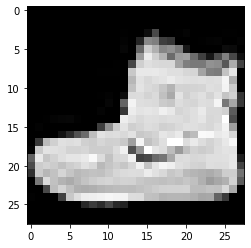

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from keras.initializers import Constant

# Funcion para definir el modelo
# Creada como funcion para reutilizarla mas adelante
def define_model(hidden_layer_size, use_flatten=True, output_size=10):
	model = Sequential() # Red neuronal de capas sequenciales

	model.add(InputLayer(input_shape=(28, 28))) # Capa de entrada con un input_shape de 28 x 28 
	
	if use_flatten:
		model.add(Flatten()) # Capa tipo flatten
	
	model.add(Dense(hidden_layer_size, activation='sigmoid')) # Capa oculta de tamaño 128, utilizando Sigmoid
	model.add(Dense(output_size, activation='softmax')) # Capa de salida de tamaño 10
	# Compilar modelo utilizando el optimizador adam
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
	return model

# Creada como funcion para reutilizarla mas adelante
def train_model(model, training_images, training_labels, epochs=10):
	# Se convierte training_labels a categorias
	y_train = to_categorical(training_labels, num_classes=10)

	# Se hace fit del modelo y se entrena durante 10 epochs con un batch size de 64
	# y se muestran los resultados de cada epoch
	return model.fit(training_images, y_train, epochs=epochs, batch_size=64, verbose=1)



# Definir modelo
model = define_model(128)

# Entrenar modelo
train_model(model, training_images, training_labels)



Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5930 - accuracy: 0.8022
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.4100 - accuracy: 0.8541
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3728 - accuracy: 0.8663
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3465 - accuracy: 0.8747
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3289 - accuracy: 0.8815
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3137 - accuracy: 0.8859
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3013 - accuracy: 0.8901
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2905 - accuracy: 0.8939
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2796 - accuracy: 0.8973
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2716 - accuracy: 0.9006

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [ ]:
# Se convierte test_labels a categorias
y_test = to_categorical(test_labels, num_classes=10)

# Se evalua el modelo utilizando test_images y y_test
score = model.evaluate(test_images, y_test, verbose=1, batch_size=64)

# Se imprime el score
print('%.3f' % (score[1] * 100))

157/157 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8783
87.830


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [ ]:
# Funcion creada para reutilizarla mas adelante
def print_predictions(model, test_images):
  classifications = model.predict(test_images)
  print(classifications[0])

  # Agregado solo para tener una mejor visualizacion
  for score in classifications[0]:
    print('%.3f' % (score * 100))

  # Clases disponibles
  print("Clases: "+str(test_labels))

print_predictions(model, test_images)

[1.9396872e-05 1.2956225e-06 7.2130997e-06 1.0875814e-05 3.6698839e-05 4.2189501e-02 1.1914443e-04 2.6762713e-02 1.8135108e-04 9.3067175e-01]
0.002
0.000
0.001
0.001
0.004
4.219
0.012
2.676
0.018
93.067
Clases: [9 2 1 ... 8 1 5]


Tu respuesta a la pregunta 3.1 aquí: El vector de numeros representa la prediccion obtenida sobre a que clase de las 10 que tenemos pertenece la imagen.

Tu respuesta a la pregunta 3.2 aquí: La primera entrada de la variable classifications corresponde a la clase 5 que es una Sandalia

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [ ]:
# Definir modelo
model_512 = define_model(512)

# Entrenar modelo
train_model(model_512, training_images, training_labels)

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.5301 - accuracy: 0.8128
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.4023 - accuracy: 0.8553
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3631 - accuracy: 0.8672
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3370 - accuracy: 0.8754
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3173 - accuracy: 0.8830
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2992 - accuracy: 0.8895
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2854 - accuracy: 0.8943
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2694 - accuracy: 0.9014
Epoch 9/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2584 - accuracy: 0.9041
Epoch 10/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2456 - accuracy: 0.9085

In [ ]:
# Definir modelo
model_1024 = define_model(1024)

# Entrenar modelo
train_model(model_1024, training_images, training_labels)

Epoch 1/10
938/938 [==============================] - 11s 11ms/step - loss: 0.5233 - accuracy: 0.8120
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.4040 - accuracy: 0.8527
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3616 - accuracy: 0.8689
Epoch 4/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3363 - accuracy: 0.8764
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3121 - accuracy: 0.8861
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2922 - accuracy: 0.8914
Epoch 7/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2781 - accuracy: 0.8960
Epoch 8/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2625 - accuracy: 0.9017
Epoch 9/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2519 - accuracy: 0.9056
Epoch 10/10
938/938 [==============================] - 10s 11ms/step - loss: 0.236

Tu respuesta a la pregunta 4.3 aquí: El tiempo para el entrenamiento aumenta de acuerdo al numero de neuronas que se especifique, la perdida o loss mejora un poco y el accuracy aumenta tambien un poco.<br> 
Para la red con <b>128</b> neuronas en la capa oculta tarda un estimado de <b>3-4s</b> por epoch, loss llega a tener un valor de <b>0.2745</b> y accuracy de <b>0.8992</b><br> 
Para la red con <b>512</b> neuronas en la capa oculta tarda un estimado de <b>6-7s</b> por epoch, loss llega a tener un valor de <b>0.2442</b> y accuracy de <b>0.90</b><br>
Para la red con <b>1024</b> neuronas en la capa oculta tarda un estimado de <b>10-11s</b> por epoch, loss llega a tener un valor de <b>0.2376</b> y accuracy de <b>0.9104</b><br>

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [ ]:
print('Prediccion utilizando capa oculta de 512')
print_predictions(model_512, test_images)

print('Prediccion utilizando capa oculta de 1024')
print_predictions(model_1024, test_images)

Prediccion utilizando capa oculta de 512
[5.6634320e-07 2.5654018e-07 6.8046342e-07 1.8111638e-07 1.3000695e-06 1.6866062e-02 1.6595142e-06 1.4058894e-02 8.1191756e-06 9.6906227e-01]
0.000
0.000
0.000
0.000
0.000
1.687
0.000
1.406
0.001
96.906
Clases: [9 2 1 ... 8 1 5]
Prediccion utilizando capa oculta de 1024
[3.0026416e-07 1.1267452e-08 4.2455007e-08 3.2611911e-08 2.3916988e-07 1.2408445e-03 1.5949960e-06 7.0658759e-03 8.7039814e-07 9.9169016e-01]
0.000
0.000
0.000
0.000
0.000
0.124
0.000
0.707
0.000
99.169
Clases: [9 2 1 ... 8 1 5]


Tu respuesta a la pregunta 5.1 aquí: Me sigue saliendo que la primer prenda de vestir de test_images es de la clase 5 (sandalia)

Tu respuesta a la pregunta 5.2 aquí: La única diferencia que veo entre las redes neuronales es que con la de la capa oculta de 128 me dió una prediccion de 91.4%, la red con la capa oculta de 512 me dió una predicción de 94.4% y la última me dió una predición de 99%.

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [ ]:
model_no_flatten = define_model(128, use_flatten=False)
train_model(model_no_flatten, training_images, training_labels)

Epoch 1/10


ValueError: ignored

Tu respuesta a la pregunta 6 aquí: Se utiliza para convertir o "aplanar" la matriz que se recibe como input a un vector.

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
model_5_output = define_model(128, output_size=5)
train_model(model_5_output, training_images, training_labels)

Epoch 1/10


ValueError: ignored

Tu respuestas a la pregunta 7.1 aquí: Son 10 porque necesitamos clasificar las prendas de vestir de entre 10 diferentes tipos de clases, si fueran mas clases deberiamos usar mas neuronas de salida.

Tu respuestas a la pregunta 7.2 aquí: Lanza error porque el tamaño de la lista "training_labels" no es igual al numero de neuronas de salida.

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
# modelo con 5 epochs
model_5_epochs = define_model(128)
train_model(model_5_epochs, training_images, training_labels, epochs=5)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.5919 - accuracy: 0.8030
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.4105 - accuracy: 0.8536
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3718 - accuracy: 0.8674
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3490 - accuracy: 0.8751
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3325 - accuracy: 0.8800


In [ ]:
# modelo con 15 epochs
model_15_epochs = define_model(128)
train_model(model_15_epochs, training_images, training_labels, epochs=15)

Epoch 1/15
938/938 [==============================] - 4s 4ms/step - loss: 0.5947 - accuracy: 0.8023
Epoch 2/15
938/938 [==============================] - 4s 4ms/step - loss: 0.4121 - accuracy: 0.8529
Epoch 3/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3744 - accuracy: 0.8656
Epoch 4/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3498 - accuracy: 0.8737
Epoch 5/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3312 - accuracy: 0.8807
Epoch 6/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3176 - accuracy: 0.8852
Epoch 7/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3038 - accuracy: 0.8900
Epoch 8/15
938/938 [==============================] - 3s 4ms/step - loss: 0.2924 - accuracy: 0.8937
Epoch 9/15
938/938 [==============================] - 3s 4ms/step - loss: 0.2828 - accuracy: 0.8974
Epoch 10/15
938/938 [==============================] - 3s 4ms/step - loss: 0.2739 - accuracy: 0.8991

In [ ]:
# modelo con 30 epochs
model_30_epochs = define_model(128)
train_model(model_30_epochs, training_images, training_labels, epochs=30)

Epoch 1/30
938/938 [==============================] - 4s 4ms/step - loss: 0.5933 - accuracy: 0.8013
Epoch 2/30
938/938 [==============================] - 3s 4ms/step - loss: 0.4115 - accuracy: 0.8532
Epoch 3/30
938/938 [==============================] - 3s 4ms/step - loss: 0.3731 - accuracy: 0.8661
Epoch 4/30
938/938 [==============================] - 4s 4ms/step - loss: 0.3488 - accuracy: 0.8737
Epoch 5/30
938/938 [==============================] - 3s 4ms/step - loss: 0.3303 - accuracy: 0.8792
Epoch 6/30
938/938 [==============================] - 3s 4ms/step - loss: 0.3158 - accuracy: 0.8867
Epoch 7/30
938/938 [==============================] - 3s 4ms/step - loss: 0.3020 - accuracy: 0.8908
Epoch 8/30
938/938 [==============================] - 3s 4ms/step - loss: 0.2918 - accuracy: 0.8931
Epoch 9/30
938/938 [==============================] - 3s 4ms/step - loss: 0.2820 - accuracy: 0.8968
Epoch 10/30
938/938 [==============================] - 3s 4ms/step - loss: 0.2723 - accuracy: 0.9010

In [ ]:
# modelo con 50 epochs
model_50_epochs = define_model(128)
train_model(model_50_epochs, training_images, training_labels, epochs=50)

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5961 - accuracy: 0.8013
Epoch 2/50
938/938 [==============================] - 3s 4ms/step - loss: 0.4113 - accuracy: 0.8536
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.3734 - accuracy: 0.8656
Epoch 4/50
938/938 [==============================] - 3s 4ms/step - loss: 0.3501 - accuracy: 0.8733
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: 0.3312 - accuracy: 0.8810
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.3149 - accuracy: 0.8872
Epoch 7/50
938/938 [==============================] - 3s 4ms/step - loss: 0.3022 - accuracy: 0.8901
Epoch 8/50
938/938 [==============================] - 3s 4ms/step - loss: 0.2917 - accuracy: 0.8933
Epoch 9/50
938/938 [==============================] - 3s 4ms/step - loss: 0.2821 - accuracy: 0.8977
Epoch 10/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2731 - accuracy: 0.9002

Tu respuesta a la pregunta 8.3 aquí: Entre mas epoch realice, mas veces recorrerá el dataset de entrenamiento, aunque en mi ejemplo no se ve que la perdida aumentara, esto es debido a la curva de aprendizaje, si se utiliza un numero de epoch inadecuado (muy grande o muy pequeño) resultando que la curva de aprendizaje quede muy cerca del eje X, hace que tengamos una mayor perdida o loss.

# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [ ]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')> 0.40):
              print("\nAlcanzado el 40% de perdida, se cancela el entrenamiento!!")
              self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.7.0
Epoch 1/50
1870/1875 [============================>.] - ETA: 0s - loss: 0.4789 - accuracy: 0.8307
Alcanzado el 40% de precisión, se cancela el entrenamiento!!
1875/1875 [==============================] - 46s 6ms/step - loss: 0.4786 - accuracy: 0.8309
